In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import re
# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
count_vector = CountVectorizer(stop_words="english",tokenizer=lambda x: x.split(','))
def remwithre(text, there=re.compile(re.escape(':')+'.*')):
  return there.sub('', text)

steam_df = pd.read_csv('./steam_games.csv',delimiter=';', low_memory=False).astype('unicode')
df = steam_df
for x in range(len(df.index)):
    df['Tags'][x] = re.sub(r':.+?,', ',',steam_df['Tags'][x])
    df['Tags'][x] = remwithre(df['Tags'][x])
df.drop(['Short Description','Type','Owners','Price','Discount','CCU','Languages','Platforms','Release Date','Required Age','Website','Header Image'], axis=1, inplace=True)
app_id_df = df['App ID']
df.sort_values(by=['Tags'])
# split the Name column into two columns
tags_df = df['Tags'].str.split(',', expand=True)
tags_df = pd.merge(app_id_df,tags_df,left_index=True,right_index=True)
count_vector.fit(steam_df['Tags'])
doc_array = count_vector.transform(steam_df['Tags']).toarray()
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names_out())
df = pd.merge(df,tags_df,on='App ID')

C:\Users\pesch102\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [2]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(frequency_matrix)
neigh.kneighbors_graph(frequency_matrix)

<55691x55691 sparse matrix of type '<class 'numpy.float64'>'
	with 55691 stored elements in Compressed Sparse Row format>

C:\Users\pesch102\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36339 (\N{CJK UNIFIED IDEOGRAPH-8DF3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pesch102\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pesch102\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21654 (\N{CJK UNIFIED IDEOGRAPH-5496}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pesch102\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32454 (\N{CJK UNIFIED IDEOGRAPH-7EC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pesch102\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32990 (\N{CJK UNIFIED IDEOGRAPH-80DE}) missing from current font.
  fig.canvas.prin

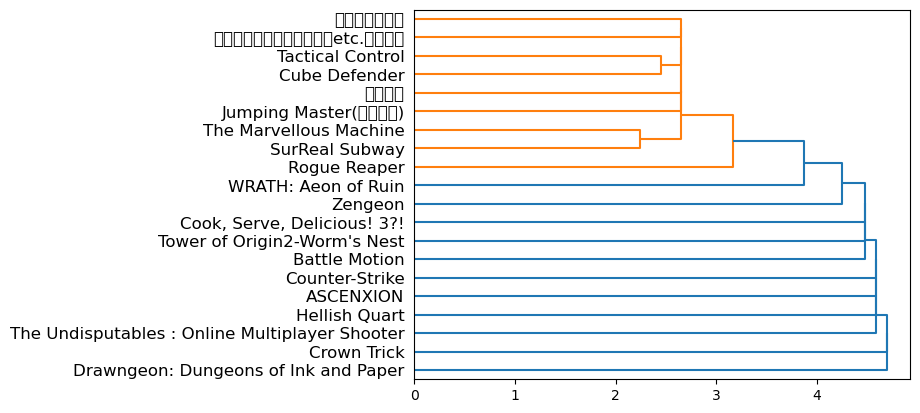

In [3]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = steam_df['Name'].head(20)
# Y = data['Class']
X = frequency_matrix.head(20)
Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

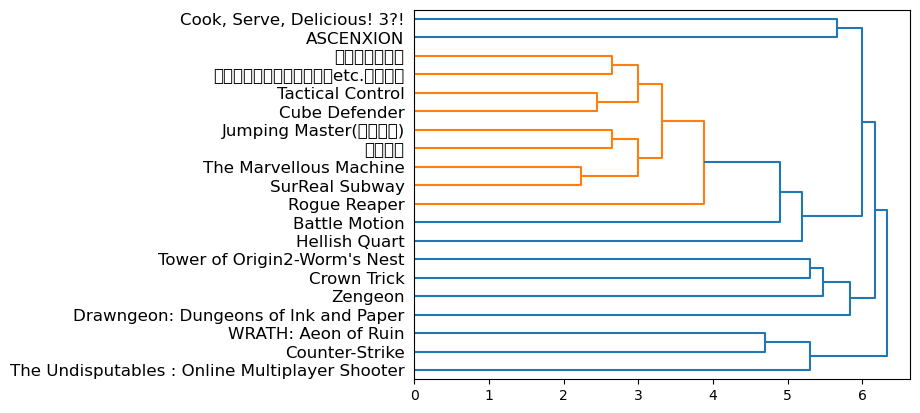

In [4]:
Z = hierarchy.linkage(X.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

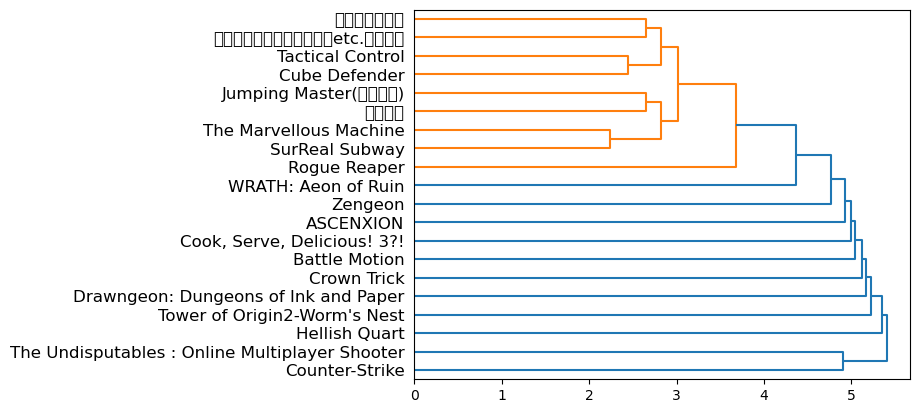

In [5]:
Z = hierarchy.linkage(X.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')